<a href="https://colab.research.google.com/github/manaswitac/Detecting-Depression-Through-Tweets/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
#Importing csv into a Dataframe
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Data/Sentiment Analysis Dataset 2.csv',on_bad_lines = 'skip')

In [ ]:
#Preview of top 5 rows
print(df.head())

   ItemID  Sentiment SentimentSource  \
0       1          0    Sentiment140   
1       2          0    Sentiment140   
2       3          1    Sentiment140   
3       4          0    Sentiment140   
4       5          0    Sentiment140   

                                       SentimentText Unnamed: 4  
0                       is so sad for my APL frie...        NaN  
1                     I missed the New Moon trail...        NaN  
2                            omg its already 7:30 :O        NaN  
3            .. Omgaga. Im sooo  im gunna CRy. I'...        NaN  
4           i think mi bf is cheating on me!!!   ...        NaN  


In [ ]:
#Checking number of null value in a row
df.isnull().sum()

ItemID                 0
Sentiment              0
SentimentSource        0
SentimentText          0
Unnamed: 4         99988
dtype: int64

In [ ]:
#Removing unneccesary columns
data = df[['Sentiment','SentimentText']]
print(data.head())

   Sentiment                                      SentimentText
0          0                       is so sad for my APL frie...
1          0                     I missed the New Moon trail...
2          1                            omg its already 7:30 :O
3          0            .. Omgaga. Im sooo  im gunna CRy. I'...
4          0           i think mi bf is cheating on me!!!   ...


In [ ]:
#Removing punctuation marks
import string
#defining function to remove punctuation marks
def punctuation_removal(sentencetext):
  returntext = ""
  for i in sentencetext:
    if i not in string.punctuation:
      returntext = returntext + i
  return returntext 
#applying the function to remove punctuation marks 
data["CleanText"] = data.loc[:,"SentimentText"].apply(lambda x : punctuation_removal(x))   
print(data.head())

   Sentiment                                      SentimentText  \
0          0                       is so sad for my APL frie...   
1          0                     I missed the New Moon trail...   
2          1                            omg its already 7:30 :O   
3          0            .. Omgaga. Im sooo  im gunna CRy. I'...   
4          0           i think mi bf is cheating on me!!!   ...   

                                           CleanText  
0                        is so sad for my APL friend  
1                      I missed the New Moon trailer  
2                              omg its already 730 O  
3             Omgaga Im sooo  im gunna CRy Ive be...  
4           i think mi bf is cheating on me       TT  


<ipython-input-7-bc87f236c625>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CleanText"] = data.loc[:,"SentimentText"].apply(lambda x : punctuation_removal(x))


In [ ]:
#Performing lower casing
data["LowercaseText"] = data.loc[:,"CleanText"].apply(lambda x : x.lower())
print(data.head())

   Sentiment                                      SentimentText  \
0          0                       is so sad for my APL frie...   
1          0                     I missed the New Moon trail...   
2          1                            omg its already 7:30 :O   
3          0            .. Omgaga. Im sooo  im gunna CRy. I'...   
4          0           i think mi bf is cheating on me!!!   ...   

                                           CleanText  \
0                        is so sad for my APL friend   
1                      I missed the New Moon trailer   
2                              omg its already 730 O   
3             Omgaga Im sooo  im gunna CRy Ive be...   
4           i think mi bf is cheating on me       TT   

                                       LowercaseText  
0                        is so sad for my apl friend  
1                      i missed the new moon trailer  
2                              omg its already 730 o  
3             omgaga im sooo  im gunna c

<ipython-input-8-32db1a049d3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["LowercaseText"] = data.loc[:,"CleanText"].apply(lambda x : x.lower())


In [ ]:
#Performing tokenization
data["TokenizedText"] = data.loc[:,"LowercaseText"].apply(lambda x : x.split())  
print(data.head())  

   Sentiment                                      SentimentText  \
0          0                       is so sad for my APL frie...   
1          0                     I missed the New Moon trail...   
2          1                            omg its already 7:30 :O   
3          0            .. Omgaga. Im sooo  im gunna CRy. I'...   
4          0           i think mi bf is cheating on me!!!   ...   

                                           CleanText  \
0                        is so sad for my APL friend   
1                      I missed the New Moon trailer   
2                              omg its already 730 O   
3             Omgaga Im sooo  im gunna CRy Ive be...   
4           i think mi bf is cheating on me       TT   

                                       LowercaseText  \
0                        is so sad for my apl friend   
1                      i missed the new moon trailer   
2                              omg its already 730 o   
3             omgaga im sooo  im gun

In [ ]:
import nltk
nltk.download()
nltk.download('stopwords') 
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in nltk.corpus.stopwords.words('english')]
    return output
#applying the function to remove stopwords
data["NoStopwordsText"]= data.loc[:,"TokenizedText"].apply(lambda x:remove_stopwords(x))    
print(data.head())

   Sentiment                                      SentimentText  \
0          0                       is so sad for my APL frie...   
1          0                     I missed the New Moon trail...   
2          1                            omg its already 7:30 :O   
3          0            .. Omgaga. Im sooo  im gunna CRy. I'...   
4          0           i think mi bf is cheating on me!!!   ...   

                                           CleanText  \
0                        is so sad for my APL friend   
1                      I missed the New Moon trailer   
2                              omg its already 730 O   
3             Omgaga Im sooo  im gunna CRy Ive be...   
4           i think mi bf is cheating on me       TT   

                                       LowercaseText  \
0                        is so sad for my apl friend   
1                      i missed the new moon trailer   
2                              omg its already 730 o   
3             omgaga im sooo  im gun

In [ ]:
from nltk.stem.porter import PorterStemmer
#defining a function for stemming
def stemming(text):
  stem_text = [PorterStemmer().stem(word) for word in text]
  return stem_text
data["StemmedText"]=data.loc[:,"NoStopwordsText"].apply(lambda x: stemming(x))
print(data.head())

   Sentiment                                      SentimentText  \
0          0                       is so sad for my APL frie...   
1          0                     I missed the New Moon trail...   
2          1                            omg its already 7:30 :O   
3          0            .. Omgaga. Im sooo  im gunna CRy. I'...   
4          0           i think mi bf is cheating on me!!!   ...   

                                           CleanText  \
0                        is so sad for my APL friend   
1                      I missed the New Moon trailer   
2                              omg its already 730 O   
3             Omgaga Im sooo  im gunna CRy Ive be...   
4           i think mi bf is cheating on me       TT   

                                       LowercaseText  \
0                        is so sad for my apl friend   
1                      i missed the new moon trailer   
2                              omg its already 730 o   
3             omgaga im sooo  im gun

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
#defining the function for lemmatization
def lemmatization(text):
  lemm_text = [WordNetLemmatizer().lemmatize(word) for word in text]
  return lemm_text
data["LemmatizedText"]=data.loc[:,"NoStopwordsText"].apply(lambda x:lemmatization(x))
print(data.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


   Sentiment                                      SentimentText  \
0          0                       is so sad for my APL frie...   
1          0                     I missed the New Moon trail...   
2          1                            omg its already 7:30 :O   
3          0            .. Omgaga. Im sooo  im gunna CRy. I'...   
4          0           i think mi bf is cheating on me!!!   ...   

                                           CleanText  \
0                        is so sad for my APL friend   
1                      I missed the New Moon trailer   
2                              omg its already 730 O   
3             Omgaga Im sooo  im gunna CRy Ive be...   
4           i think mi bf is cheating on me       TT   

                                       LowercaseText  \
0                        is so sad for my apl friend   
1                      i missed the new moon trailer   
2                              omg its already 730 o   
3             omgaga im sooo  im gun

Text(0.5, 1.0, 'WordCloud - Vocabulary from SentimentText')

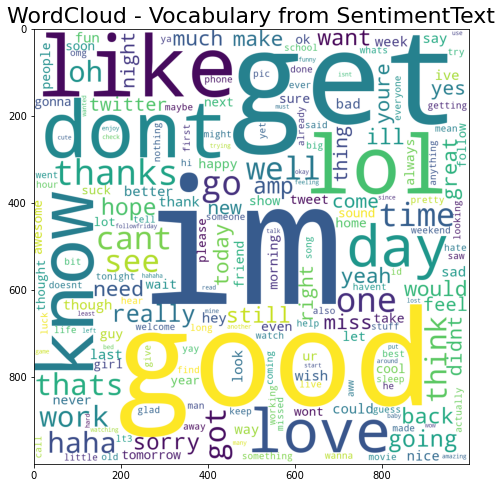

In [ ]:
#List of all Lemmatized texts
Words = []
for i in data["LemmatizedText"]:
  Words = Words+i 
#Using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
text = cv.fit_transform(Words)
sum_text = text.sum(axis=0)
text_freq = [(word, sum_text[0, i]) for word, i in cv.vocabulary_.items()]
text_freq = sorted(text_freq, key = lambda x: x[1], reverse = True)

#Plotting wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(text_freq))

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from SentimentText", fontsize = 22)

Text(0.5, 1.0, 'WordCloud - Vocabulary from Negative SentimentText')

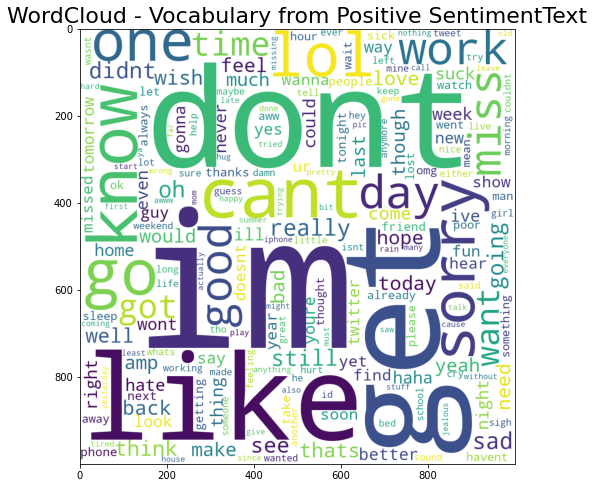

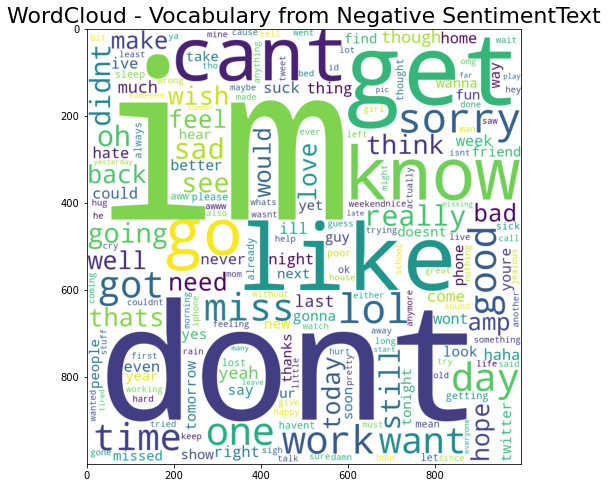

In [ ]:
#List of all Lemmatized texts
PositiveWords = []
NegativeWords = []
for i in data[data["Sentiment"]==0]["LemmatizedText"]:
  PositiveWords = PositiveWords+ i
for i in data[data["Sentiment"]==0]["LemmatizedText"]:  
  NegativeWords = NegativeWords+i    

#Using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv1 = CountVectorizer()
cv2 = CountVectorizer()
positivetext = cv1.fit_transform(PositiveWords)
sum_positivetext = positivetext.sum(axis=0)
positivetext_freq = [(word, sum_positivetext[0, i]) for word, i in cv1.vocabulary_.items()]
positivetext_freq = sorted(positivetext_freq, key = lambda x: x[1], reverse = True)

negativetext = cv2.fit_transform(NegativeWords)
sum_negativetext = negativetext.sum(axis=0)
negativetext_freq = [(word, sum_negativetext[0, i]) for word, i in cv2.vocabulary_.items()]
negativetext_freq = sorted(negativetext_freq, key = lambda x: x[1], reverse = True)

#Plotting wordcloud
from wordcloud import WordCloud

wordcloud1 = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(positivetext_freq))
wordcloud2 = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(negativetext_freq))

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(wordcloud1)
plt.title("WordCloud - Vocabulary from Positive SentimentText", fontsize = 22)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud2)
plt.title("WordCloud - Vocabulary from Negative SentimentText", fontsize = 22)

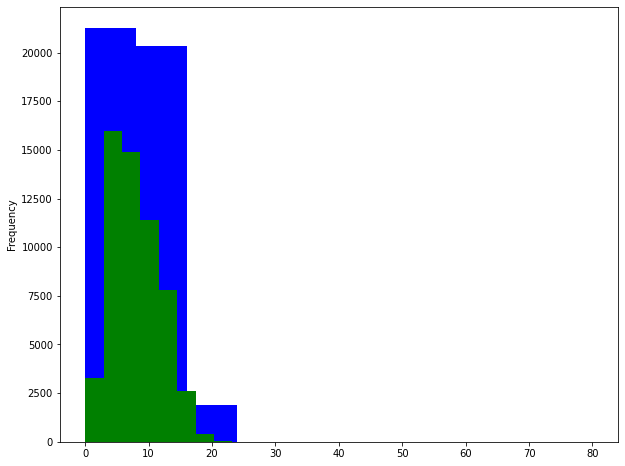

In [ ]:
#Sentence length plots of both positive and negative tweets
data["Length"]=data.loc[:,"LemmatizedText"].apply(lambda x:len(x))
len_positivetext = data[data["Sentiment"]==0]["Length"].plot.hist(color='blue',figsize=(10,8))#positive tweets
len_negativetext = data[data["Sentiment"]==1]["Length"].plot.hist(color='green',figsize=(10,8))#negative tweets

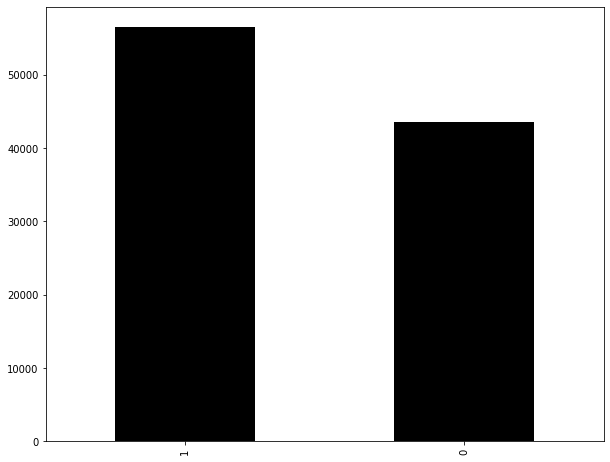

In [ ]:
#Count plot of tweets
data["Sentiment"].value_counts().plot.bar(color = 'black', figsize = (10,8))

In [ ]:
shortdata = data[["Sentiment","SentimentText"]]
print("Examples of 5 positive tweets:")
print(shortdata[shortdata["Sentiment"]==0].head())
print("Examples of 5 negative tweets:")
print(shortdata[shortdata["Sentiment"]==1].head())

Examples of 5 positive tweets:
   Sentiment                                      SentimentText
0          0                       is so sad for my APL frie...
1          0                     I missed the New Moon trail...
3          0            .. Omgaga. Im sooo  im gunna CRy. I'...
4          0           i think mi bf is cheating on me!!!   ...
5          0                  or i just worry too much?        
Examples of 5 negative tweets:
    Sentiment                                      SentimentText
2           1                            omg its already 7:30 :O
6           1                 Juuuuuuuuuuuuuuuuussssst Chillin!!
8           1        handed in my uniform today . i miss you ...
9           1           hmmmm.... i wonder how she my number @-)
11          1        thanks to all the haters up in my face a...


In [ ]:
for i in range(len(data)):
    if(data.loc[i,"Sentiment"]==0):
      if(max1<data.loc[i,"Length"]):
        max1 = data.loc[i,"Length"]
        text1 = data.loc[i,"SentimentText"]
    else:
      if(max2<data.loc[i,"Length"]):
        max2 = data.loc[i,"Length"]
        text2 = data.loc[i,"SentimentText"] 
print(f"Tweet with maximum length in positive tweets is: {text1} with length: {max1}")
print(f"Tweet with maximum length in negative tweets is: {text2} with length: {max2}")

Tweet with maximum length in positive tweets is:  brokeback mountain was terrible.
8838,0,Sentiment140,# @Catherine42 I wouldn't mind but I only had 1/2 a portion &amp; then left 1/2 the cream  just fruit for me then until my hols  x
8839,1,Sentiment140,# @DeliciousLunch ... dark chocolate cookies? oh you tease! I'm writing to day n dipping into twitter for company 
8840,1,Sentiment140,# followfriday @mstuyvenberg @feb_unsw @hazelmail @beckescreet - all almost as cool as he-man and she-ra 
8841,1,Sentiment140,# followfriday @presentsqueen because she talks sense 
8842,1,Sentiment140,# New York is the most amazing city i've ever been to 
8843,0,Sentiment140,# number times I bottomed out just in our driveway = 4... a 6.5 hour trip to mass.. I'm scared 
8844,0,Sentiment140,# of NYC celebrity street vendors &gt; # of POA celebrities  http://streetvendor.org/media/pdfs/Side2.pdf
8845,1,Sentiment140,###### yay ##### thanks @matclayton ##### 
8846,0,Sentiment140,#$%#$^#%@ I HATE THE DENTIST w